# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [49]:
def slope(X, Y):
    X_norm = np.array([i - X.mean() for i in X])
    Y_norm = np.array([i - Y.mean() for i in Y])
    m_num = sum([X_norm[i] * Y_norm[i] for i in list(range(len(X)))])
    m_den = sum([i**2 for i in X_norm])
    return round(m_num / m_den, 2)
m = slope(X, Y)
m

0.56

In [51]:
def y_int(Y, X, m):
    return Y.mean() - m * X.mean()

b = y_int(Y, X, m)
b

6.32

In [52]:
def predicted_ys(X, m, b):
    return np.array([b + m * i for i in X])

y_pred = predicted_ys(X, m, b)
y_pred

array([ 6.88,  7.44,  8.  ,  8.56,  9.12,  9.68, 10.24, 10.8 , 11.36,
       11.92])

In [54]:
def ybar_arr(Y):
    return [Y.mean() for i in Y]

y_mean = ybar_arr(Y)
y_mean

[9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4]

In [55]:
def sq_errors(y1, y2):
    errors = [(y1[i] - y2[i])**2 for i in list(range(len(y1)))]
    return sum(errors)

sse = sq_errors(Y, y_pred)
sst = sq_errors(Y, y_mean)
r_squared = 1 - sse/sst
round(r_squared, 2)

0.97

Basic Regression Diagnostics
 Slope: 0.56
 Y-Intercept: 6.32
 R-Squared: 0.97 

Model: Y = 0.56 * X + 6.32


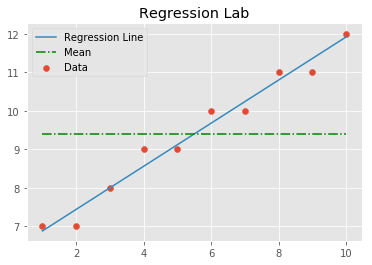

In [56]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print('Basic Regression Diagnostics')
print(' Slope:', m)
print(' Y-Intercept:', b)
print(' R-Squared:', round(r_squared, 2), '\n')
print('Model: Y =', m, '* X +', b)

plt.scatter(X, Y, label='Data')
plt.plot(X, y_pred, color = 'C1', label='Regression Line')
plt.plot(X, y_mean, color = 'g', linestyle='-.', label='Mean')
plt.title('Regression Lab')
plt.legend()
plt.show()

In [57]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

Basic Regression Diagnostics
 Slope: 0.56
 Y-Intercept: 6.32
 R-Squared: 0.97 

Model: Y = 0.56 * X + 6.32


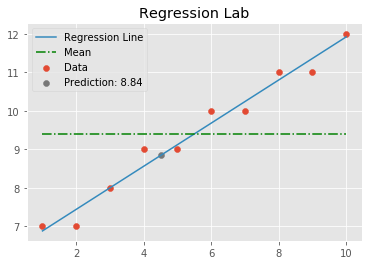

In [58]:
# Make prediction using given value and visualize on the scatter plot
predicted_Y = m*4.5 + b

print('Basic Regression Diagnostics')
print(' Slope:', m)
print(' Y-Intercept:', b)
print(' R-Squared:', round(r_squared, 2), '\n')
print('Model: Y =', m, '* X +', b)

plt.scatter(X, Y, label='Data')
plt.scatter(4.5, predicted_Y, color = 'C3', label=f'Prediction: {predicted_Y}')
plt.plot(X, y_pred, color = 'C1', label='Regression Line')
plt.plot(X, y_mean, color = 'g', linestyle='-.', label='Mean')
plt.title('Regression Lab')
plt.legend()
plt.show()

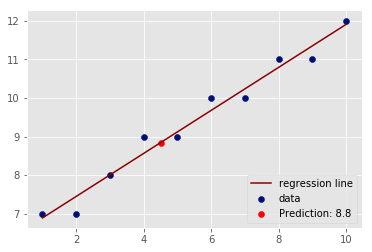

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

In [60]:
import pandas as pd
df = pd.read_csv('heightWeight.csv')
df.head()

,height,Weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [73]:
m = slope(df.height, df.Weight)
b = y_int(df.Weight, df.height, m)
weight_pred = predicted_ys(df.height, m, b)
avg_weights = ybar_arr(df.Weight)
weight_sse = sq_errors(df.Weight, weight_pred)
weight_sst = sq_errors(df.Weight, avg_weights)
r_squared = 1 - weight_sse/weight_sst

weight_prediction = m * 69 + b

Height/Weight Regression Diagnostics
 Slope: 5.54
 Y-Intercept: -204.55
 R-Squared: 0.96 

Model: W = 5.54 * H - 204.55


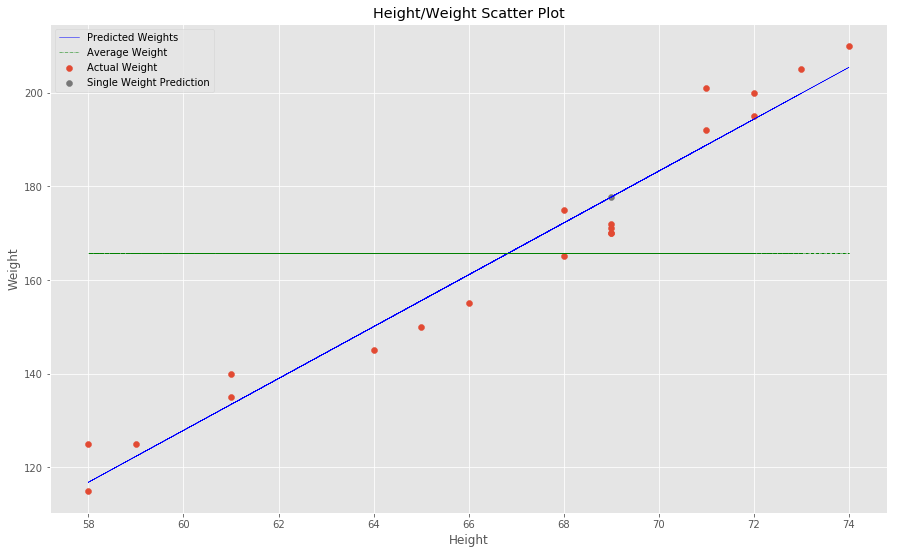

In [86]:
print('Height/Weight Regression Diagnostics')
print(' Slope:', m)
print(' Y-Intercept:', round(b, 2))
print(' R-Squared:', round(r_squared, 2), '\n')
print('Model: W =', m, '* H -', abs(round(b, 2)))

plt.figure(figsize=(15, 9))
plt.scatter(df.height, df.Weight, label = 'Actual Weight')
plt.scatter(69, weight_prediction, label = 'Single Weight Prediction', color = 'C3')
plt.plot(df.height, weight_pred, color='b', lw=.5, label='Predicted Weights')
plt.plot(df.height, avg_weights, lw = .5,linestyle='-.', label='Average Weight', color = 'g')
plt.title('Height/Weight Scatter Plot')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 